<a href="https://colab.research.google.com/github/Ibrahim-Ehab/COVID-19_detection_using-CNN/blob/main/COVID_19_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd,matplotlib.pyplot as plt,plotly.graph_objects as go
from fbprophet import Prophet
from sklearn.metrics import r2_score

In [2]:
confirmed_file=pd.read_json('https://api.covid19api.com/country/egypt/status/confirmed/live')
confirmed_file

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Egypt,EG,,,,26.82,30.8,0,confirmed,2020-01-22 00:00:00+00:00
1,Egypt,EG,,,,26.82,30.8,0,confirmed,2020-01-23 00:00:00+00:00
2,Egypt,EG,,,,26.82,30.8,0,confirmed,2020-01-24 00:00:00+00:00
3,Egypt,EG,,,,26.82,30.8,0,confirmed,2020-01-25 00:00:00+00:00
4,Egypt,EG,,,,26.82,30.8,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
856,Egypt,EG,,,,26.82,30.8,515645,confirmed,2022-05-27 00:00:00+00:00
857,Egypt,EG,,,,26.82,30.8,515645,confirmed,2022-05-28 00:00:00+00:00
858,Egypt,EG,,,,26.82,30.8,515645,confirmed,2022-05-29 00:00:00+00:00
859,Egypt,EG,,,,26.82,30.8,515645,confirmed,2022-05-30 00:00:00+00:00


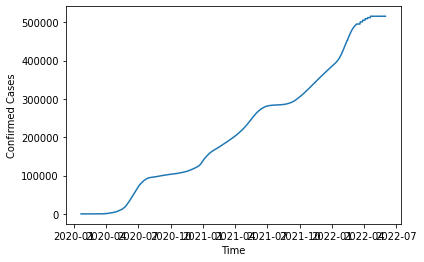

In [3]:
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.plot(confirmed_file['Date'],confirmed_file['Cases'])
plt.show()

In [4]:
cases_data=confirmed_file.copy()
cases_data.drop(['Country','CountryCode','Province','City','CityCode','Lat','Lon','Status'],axis=1,inplace=True)
cases_data.dropna()
cases_data

,Cases,Date
0,0,2020-01-22 00:00:00+00:00
1,0,2020-01-23 00:00:00+00:00
2,0,2020-01-24 00:00:00+00:00
3,0,2020-01-25 00:00:00+00:00
4,0,2020-01-26 00:00:00+00:00
...,...,...
856,515645,2022-05-27 00:00:00+00:00
857,515645,2022-05-28 00:00:00+00:00
858,515645,2022-05-29 00:00:00+00:00
859,515645,2022-05-30 00:00:00+00:00


In [5]:
cases_data['Date']=pd.to_datetime(cases_data['Date']).dt.date
cases_data.columns=['y','ds']
cols=cases_data.columns.tolist()
cols=cols[-1:]+cols[:-1]
confirmed_cases=cases_data[cols]
confirmed_cases

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
856,2022-05-27,515645
857,2022-05-28,515645
858,2022-05-29,515645
859,2022-05-30,515645


In [6]:
model=Prophet(interval_width=0.97)
model.fit(confirmed_cases)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future=model.make_future_dataframe(periods=7,freq='D')
forecast=model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,16234.576080,-870.336536,3428.947377,16234.576080,16234.576080,-14956.431623,-14956.431623,-14956.431623,23.480395,23.480395,23.480395,-14979.912018,-14979.912018,-14979.912018,0.0,0.0,0.0,1278.144457
1,2020-01-23,14684.950514,-1288.187516,2994.388176,14684.950514,14684.950514,-13763.566195,-13763.566195,-13763.566195,2.737953,2.737953,2.737953,-13766.304148,-13766.304148,-13766.304148,0.0,0.0,0.0,921.384319
2,2020-01-24,13135.324948,-1642.618861,2870.927281,13135.324948,13135.324948,-12521.758573,-12521.758573,-12521.758573,-15.138947,-15.138947,-15.138947,-12506.619625,-12506.619625,-12506.619625,0.0,0.0,0.0,613.566375
3,2020-01-25,11585.699382,-1929.055283,2527.956329,11585.699382,11585.699382,-11244.941725,-11244.941725,-11244.941725,-40.810614,-40.810614,-40.810614,-11204.131111,-11204.131111,-11204.131111,0.0,0.0,0.0,340.757657
4,2020-01-26,10036.073816,-2201.973815,2269.918226,10036.073816,10036.073816,-9948.069843,-9948.069843,-9948.069843,-85.743872,-85.743872,-85.743872,-9862.325970,-9862.325970,-9862.325970,0.0,0.0,0.0,88.003973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,2022-06-03,499613.570641,515746.762366,520496.580136,499037.405088,500260.693390,18547.214929,18547.214929,18547.214929,-15.138947,-15.138947,-15.138947,18562.353876,18562.353876,18562.353876,0.0,0.0,0.0,518160.785570
864,2022-06-04,500180.326819,516208.492230,521031.530699,499335.393016,501391.576939,18408.645444,18408.645444,18408.645444,-40.810614,-40.810614,-40.810614,18449.456058,18449.456058,18449.456058,0.0,0.0,0.0,518588.972262
865,2022-06-05,500747.082996,516411.905805,521970.447905,499252.646675,502464.553177,18285.260951,18285.260951,18285.260951,-85.743872,-85.743872,-85.743872,18371.004823,18371.004823,18371.004823,0.0,0.0,0.0,519032.343947
866,2022-06-06,501313.839174,517188.657495,523234.999387,499319.010470,503669.412536,18375.235309,18375.235309,18375.235309,50.485162,50.485162,50.485162,18324.750146,18324.750146,18324.750146,0.0,0.0,0.0,519689.074483


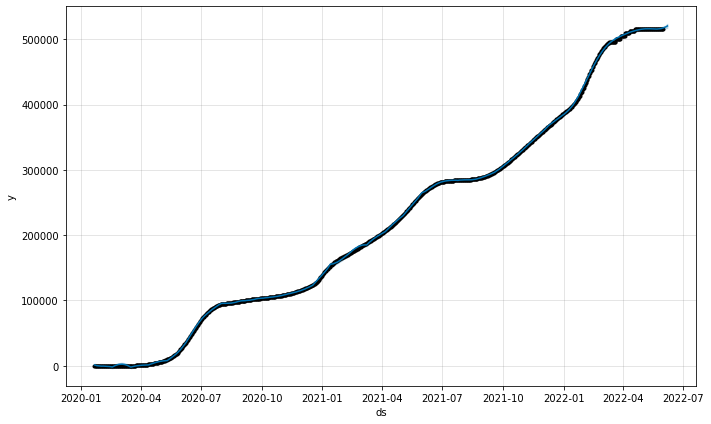

In [8]:
model.plot(forecast)
plt.show()

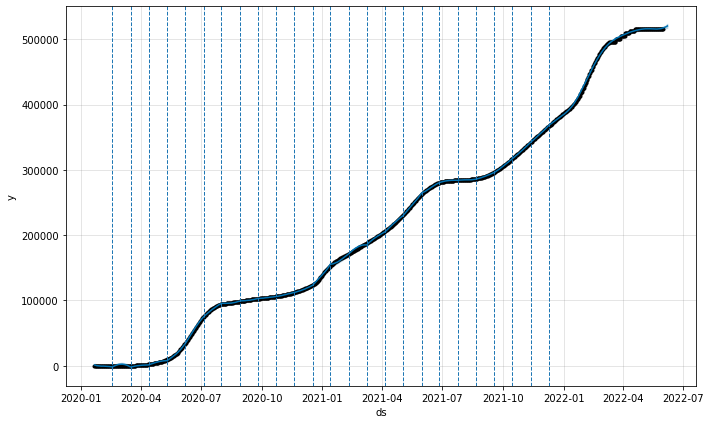

In [9]:
model.plot(forecast)
for changepoint in model.changepoints:
  plt.axvline(changepoint,ls='--',lw=1)
plt.show()

In [10]:
metric_df=forecast.set_index('ds')[['yhat']].join(cases_data.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
r2_score(metric_df.y, metric_df.yhat)


0.9999607550471051

#This notebook made by:
    Ibrahim Ehab Abdelmaged